In [1]:
import tarfile
import numpy as np
import matplotlib.pyplot as plt

# Power Model - on Worker node [192.168.58.68]

## Experiment Setup
```
### Config: [TurboBoostOn.HyperThreadOn, TurboBoostOff.HyperThreadOff]
### Iterations: 3
### Number CPUs: TurboBoostOn.HyperThreadOn -> [1 - 32], TurboBoostOff.HyperThreadOff-> [1 - 16]
### Workload: stress-ng --vm $i --vm-bytes 1500M --mmap $i --mmap-bytes 1500M --page-in -t 60s
```

## Experiment Run
```
For each Iterations, and Config above, I ran stress-ng for 60 seconds each with a different number of CPUs increasing from 1 to 32 or 16, depending on the Config. As it is running, I collected the power measurement using this tool: https://github.com/handong32/rapl-service, which spills the per package CPU and DRAM power reading into a file. Figures below are the result of this experiment.
```

In [2]:
def plot(axs, combofig):
    # Plot data on each subplot
    for i, ax in enumerate(axs.flat):
        print(combofig[i])
    
        iter=combofig[i][0]
        tbht=combofig[i][1]
        ncpus=combofig[i][2]
        
        x = []
        ycpu = []
        ycpu_std = []
        ydram = []
        ydram_std = []
        for ncpu in range(1, ncpus+1):
            fname = f"stress-ng.iter{iter}.numcpus{ncpu}.{tbht}.vm.60"
            print(f"🟢 🟢 Reading {fname} 🟢 🟢")
            f=tar.extractfile(fname)
            content=f.read()
            decoded_content = content.decode("utf-8")
            cpupkgs=[]
            drampkgs=[]
            for line in decoded_content.split("\n"):
                if len(line) > 0:
                    ll = line.split(" ")
                    if float(ll[0]) > 0.0 and float(ll[1]) > 0.0:
                        cpupkgs.append(float(ll[0]))
                        drampkgs.append(float(ll[1]))
            print(np.mean(np.array(cpupkgs)), np.std(np.array(cpupkgs)))
            x.append(ncpu)
            ycpu.append(np.mean(np.array(cpupkgs)))
            ycpu_std.append(np.std(np.array(cpupkgs)))
            ydram.append(np.mean(np.array(drampkgs)))
            ydram_std.append(np.std(np.array(drampkgs)))
        ax.errorbar(x, ycpu, yerr=ycpu_std, fmt='x', capsize=1, label="CPU Package")
        ax.errorbar(x, ydram, yerr=ydram_std, fmt='o', capsize=1, label="DRAM Package")
        ax.set_xlabel('VM Instances')
        ax.set_ylabel('Mean Package Power (W)')
        ax.set_ylim(bottom=0, top=200)
        ax.set_title(f"Iteration [{iter+1}], {tbht}, \n stress-ng --vm --vm-bytes 1500M -t 60s")
        ax.grid(True)
        ax.legend()
        #plt.show()
        
    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
tar = tarfile.open("/users/gustinj/results/stress-ng-results.tar.gz")


[0, 'TurboOn.HyperThreadOn', 32]
🟢 🟢 Reading stress-ng.iter0.numcpus1.TurboOn.HyperThreadOn.vm.60 🟢 🟢
37.995863783333334 10.92326682731802
🟢 🟢 Reading stress-ng.iter0.numcpus2.TurboOn.HyperThreadOn.vm.60 🟢 🟢
58.64708954237288 5.502812211088354
🟢 🟢 Reading stress-ng.iter0.numcpus3.TurboOn.HyperThreadOn.vm.60 🟢 🟢
66.16717213793103 6.151757532134531
🟢 🟢 Reading stress-ng.iter0.numcpus4.TurboOn.HyperThreadOn.vm.60 🟢 🟢
70.87764249180327 12.30141838677996
🟢 🟢 Reading stress-ng.iter0.numcpus5.TurboOn.HyperThreadOn.vm.60 🟢 🟢
78.58873255172412 7.150792947948365
🟢 🟢 Reading stress-ng.iter0.numcpus6.TurboOn.HyperThreadOn.vm.60 🟢 🟢
86.62231860344828 6.838430245763908
🟢 🟢 Reading stress-ng.iter0.numcpus7.TurboOn.HyperThreadOn.vm.60 🟢 🟢
90.00697731666669 11.635750643005368
🟢 🟢 Reading stress-ng.iter0.numcpus8.TurboOn.HyperThreadOn.vm.60 🟢 🟢
94.14791872413792 10.325071818440978
🟢 🟢 Reading stress-ng.iter0.numcpus9.TurboOn.HyperThreadOn.vm.60 🟢 🟢
98.0717256440678 10.343033767962975
🟢 🟢 Reading stress-

[0, 'TurboOff.HyperThreadOff', 16]
🟢 🟢 Reading stress-ng.iter0.numcpus1.TurboOff.HyperThreadOff.vm.60 🟢 🟢
40.31881914999999 6.670685536988848
🟢 🟢 Reading stress-ng.iter0.numcpus2.TurboOff.HyperThreadOff.vm.60 🟢 🟢
52.244112 5.257288290267836
🟢 🟢 Reading stress-ng.iter0.numcpus3.TurboOff.HyperThreadOff.vm.60 🟢 🟢
59.90837791525425 3.304740542341168
🟢 🟢 Reading stress-ng.iter0.numcpus4.TurboOff.HyperThreadOff.vm.60 🟢 🟢
65.81513288135592 5.305585767197883
🟢 🟢 Reading stress-ng.iter0.numcpus5.TurboOff.HyperThreadOff.vm.60 🟢 🟢
73.66546733333332 8.131433780835772
🟢 🟢 Reading stress-ng.iter0.numcpus6.TurboOff.HyperThreadOff.vm.60 🟢 🟢
79.2759450677966 10.726982229399738
🟢 🟢 Reading stress-ng.iter0.numcpus7.TurboOff.HyperThreadOff.vm.60 🟢 🟢
85.95783893333332 12.622400662214284
🟢 🟢 Reading stress-ng.iter0.numcpus8.TurboOff.HyperThreadOff.vm.60 🟢 🟢
94.75014898305086 11.215840369914043
🟢 🟢 Reading stress-ng.iter0.numcpus9.TurboOff.HyperThreadOff.vm.60 🟢 🟢
95.81229751666666 11.363851815984313
🟢 🟢 Rea

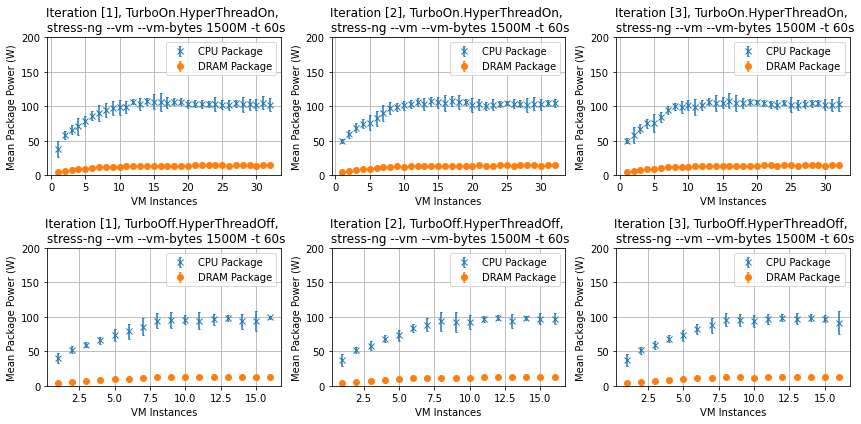

In [3]:
# Create a figure and subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 6))

combofig = {0: [0, "TurboOn.HyperThreadOn", 32], 1: [1, "TurboOn.HyperThreadOn", 32], 2: [2, "TurboOn.HyperThreadOn", 32],
           3: [0, "TurboOff.HyperThreadOff", 16], 4: [1, "TurboOff.HyperThreadOff", 16], 5: [2, "TurboOff.HyperThreadOff", 16]}

plot(axs, combofig)

# Analysis of figures above
```
1) Top 3 figures has TurboBoost and HyperThread ON, and bottom 3 figures has them disabled
2) The X-axis Mean Package Power (W), is averaged over a 60 second run of stress-ng with an increasing number of CPUs set. There is also standard deviation shown as y-error bars for each mean power measurement.
3) Mean Package Power levels off at around 10 instances for Hyperthreading / Turbo Boost enabled and around 8 instances with those settings disabled, likely due to peak power consumption.
3) There is a difference in Power between the two Configs (see figures below), with the config having TurboBoost and HyperThreading disabled having a shallower slope, as noted by when the system reaches peak power consumption - perhaps the CPU frequency is boosted to support the stress-ng workload, we don't measure performance of stress-ng so its hard to say what is the performance-power trade-off in this scenario
```